#   Question 1

##   Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm   

In [2]:
bank = pd.read_csv("bank-full.csv", sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank = bank.astype({"job":'category',"marital":'category',"education":'category',"default":'category',"housing":"category",
                   "loan":"category","contact":"category","month":"category","poutcome":"category","y":"category"})

In [5]:
bank.job.cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [6]:
bank.job.cat.codes

0         4
1         9
2         2
3         1
4        11
         ..
45206     9
45207     5
45208     5
45209     1
45210     2
Length: 45211, dtype: int8

In [7]:
bank.job = bank.job.cat.codes
bank.marital = bank.marital.cat.codes
bank.education = bank.education.cat.codes
bank.default = bank.default.cat.codes
bank.housing = bank.housing.cat.codes
bank.loan = bank.loan.cat.codes
bank.contact = bank.contact.cat.codes
bank.month = bank.month.cat.codes
bank.poutcome = bank.poutcome.cat.codes
bank.y = bank.y.cat.codes

In [8]:
bank_2 = bank.copy()
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [9]:
bank_data = bank
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  y          45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


##  Correlation 

In [11]:
corr = bank.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


##  Exploratory data analysis 

<AxesSubplot:>

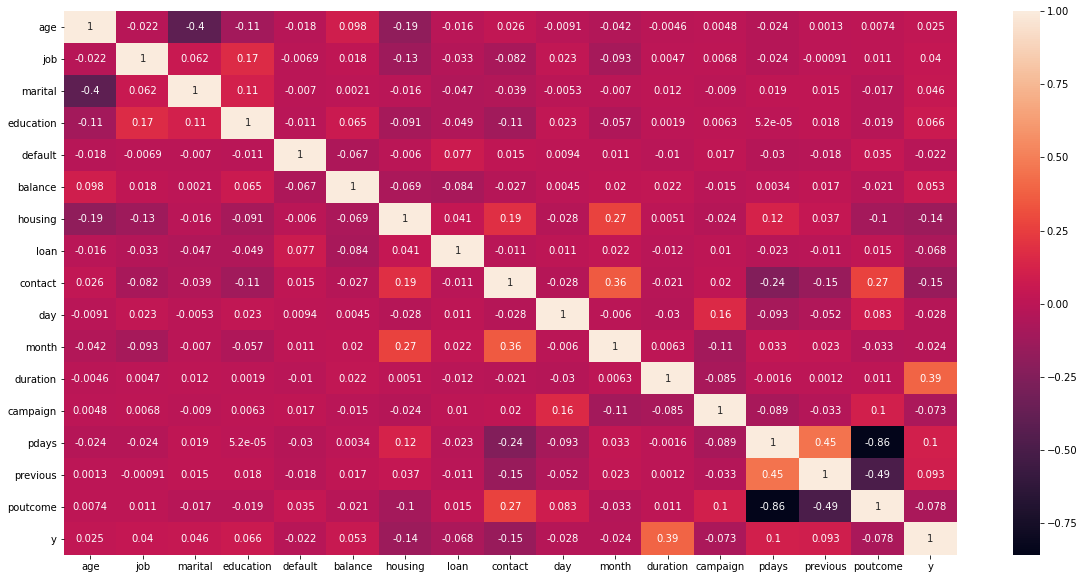

In [12]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,  annot=True)

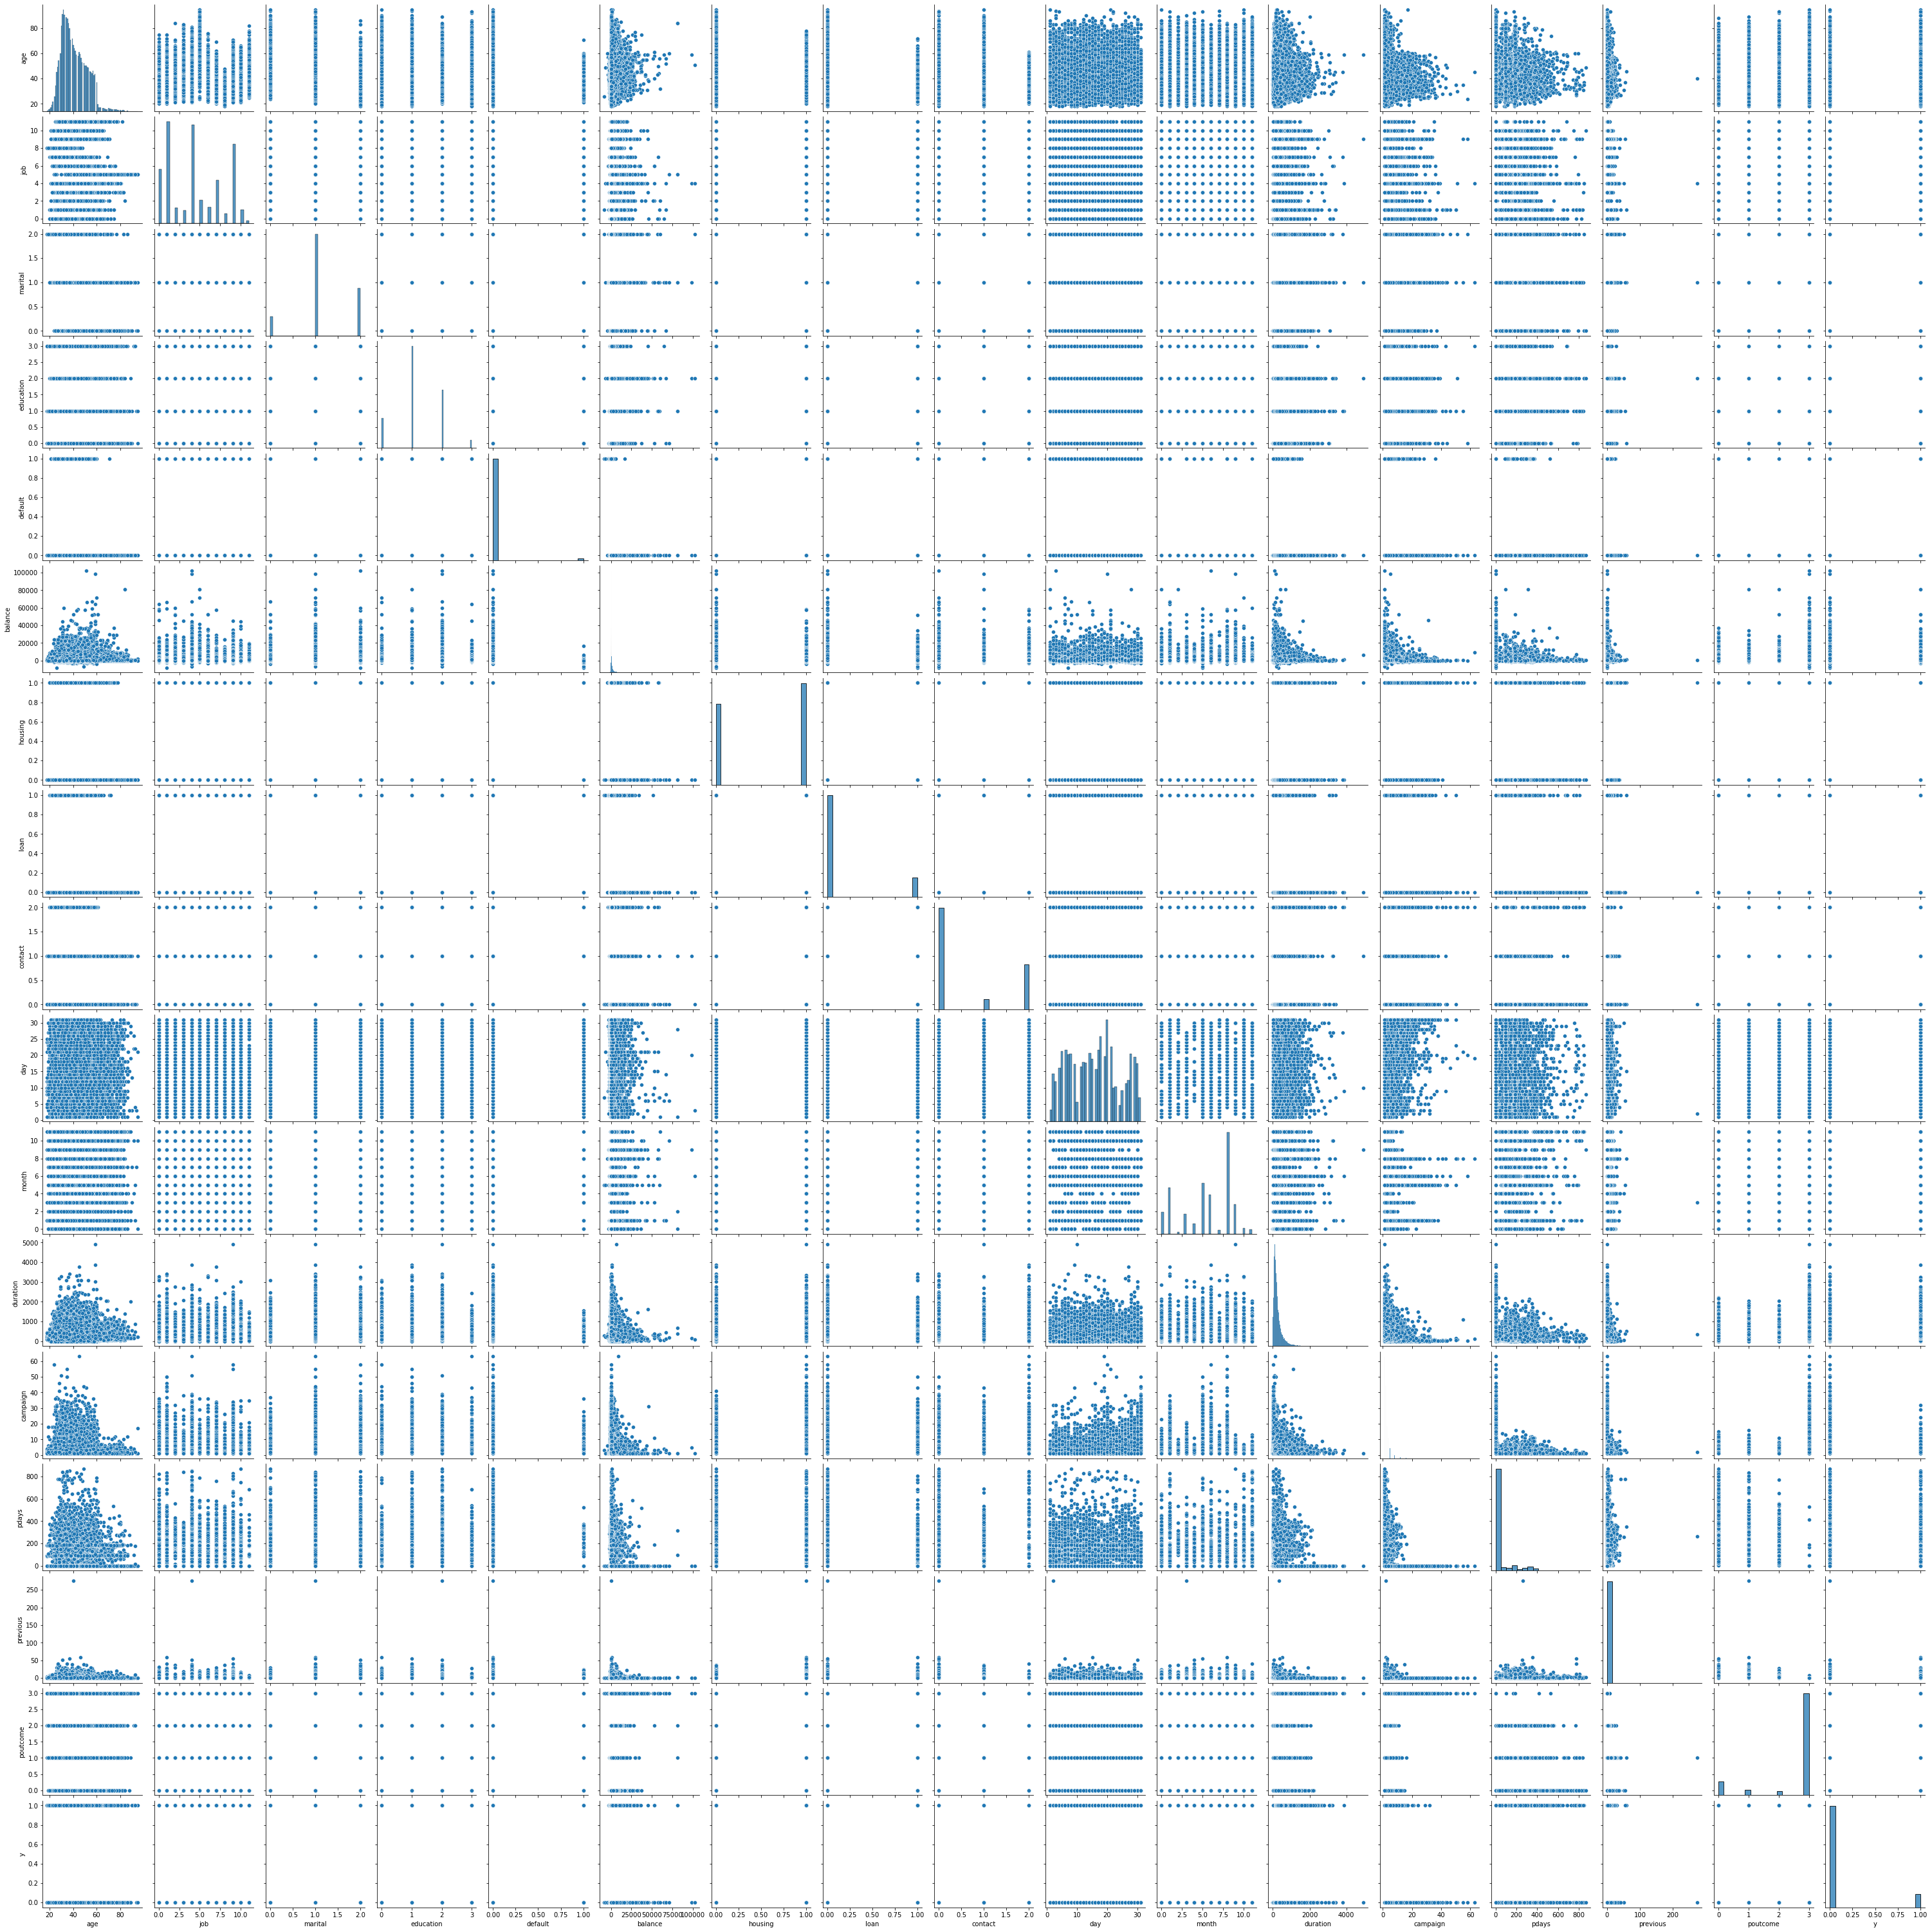

In [13]:
sns.pairplot(bank_data)

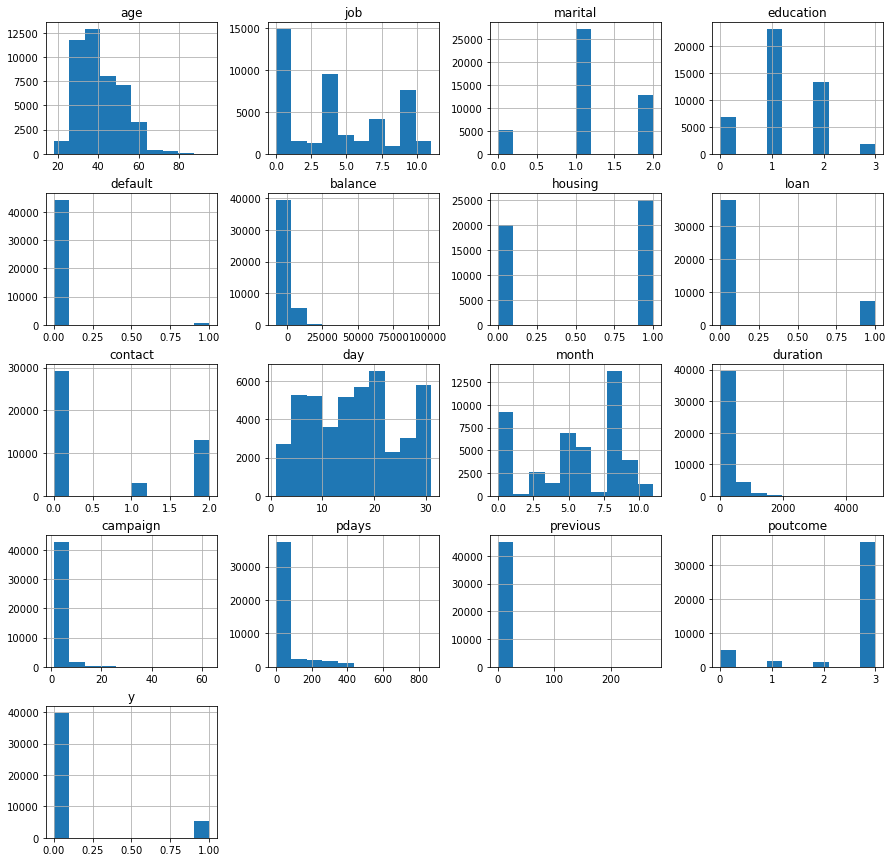

In [14]:
bank_data.hist(figsize=(15,15))
plt.show()

###  Age distribution 

<AxesSubplot:xlabel='age', ylabel='count'>

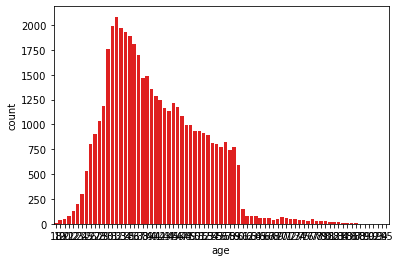

In [15]:
sns.countplot(x="age", data=bank_data, color="red")

###  age vs y

In [16]:
pd.crosstab(bank_data.age,bank_data.y)

y,0,1
age,,
18,5,7
19,24,11
20,35,15
21,57,22
22,89,40
...,...,...
90,0,2
92,0,2
93,0,2


<AxesSubplot:xlabel='age'>

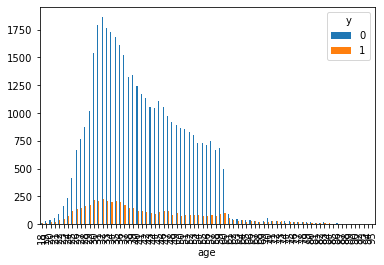

In [17]:
pd.crosstab(bank_data.age,bank_data.y).plot(kind="bar")

###  job vs y 

In [18]:
pd.crosstab(bank_data.job,bank_data.y)

y,0,1
job,,
0,4540,631
1,9024,708
2,1364,123
3,1131,109
4,8157,1301
5,1748,516
6,1392,187
7,3785,369
8,669,269


<AxesSubplot:xlabel='job'>

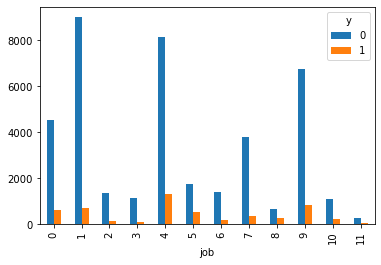

In [19]:
pd.crosstab(bank_data.job,bank_data.y).plot(kind="bar")

###  marital vs y 

In [20]:
pd.crosstab(bank_data.marital,bank_data.y)

y,0,1
marital,,
0,4585,622
1,24459,2755
2,10878,1912


<AxesSubplot:xlabel='marital'>

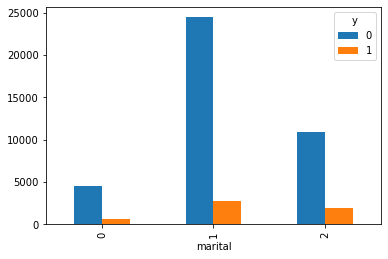

In [21]:
pd.crosstab(bank_data.marital,bank_data.y).plot(kind="bar")

###  education vs y

In [22]:
pd.crosstab(bank_data.education,bank_data.y)

y,0,1
education,,
0,6260,591
1,20752,2450
2,11305,1996
3,1605,252


<AxesSubplot:xlabel='education'>

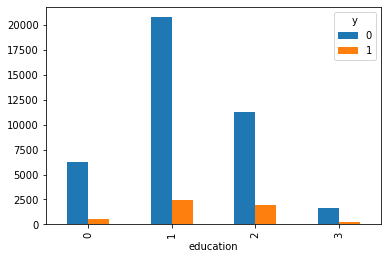

In [23]:
pd.crosstab(bank_data.education,bank_data.y).plot(kind="bar")

###  default vs y 

In [24]:
pd.crosstab(bank_data.default,bank_data.y)

y,0,1
default,,
0,39159,5237
1,763,52


<AxesSubplot:xlabel='default'>

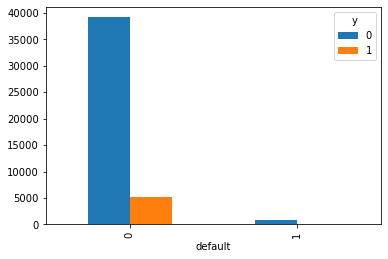

In [25]:
pd.crosstab(bank_data.default,bank_data.y).plot(kind="bar")

###  balance vs y

In [26]:
pd.crosstab(bank_data.balance,bank_data.y)

y,0,1
balance,,
-8019,1,0
-6847,1,0
-4057,1,0
-3372,1,0
-3313,1,0
...,...,...
66721,1,0
71188,1,0
81204,0,2


<AxesSubplot:xlabel='balance'>

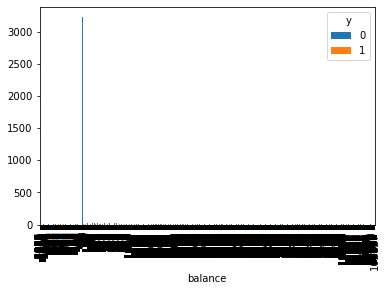

In [27]:
pd.crosstab(bank_data.balance,bank_data.y).plot(kind="bar")

###    housing vs y 

In [28]:
pd.crosstab(bank_data.housing,bank_data.y)

y,0,1
housing,,
0,16727,3354
1,23195,1935


<AxesSubplot:xlabel='housing'>

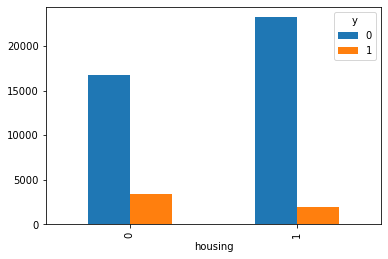

In [29]:
pd.crosstab(bank_data.housing,bank_data.y).plot(kind="bar")

###  loan vs y 

In [30]:
pd.crosstab(bank_data.loan,bank_data.y)

y,0,1
loan,,
0,33162,4805
1,6760,484


<AxesSubplot:xlabel='loan'>

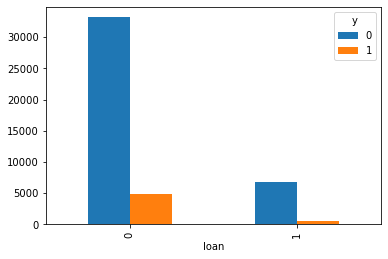

In [31]:
pd.crosstab(bank_data.loan,bank_data.y).plot(kind="bar")

###   month vs y

In [32]:
pd.crosstab(bank_data.month,bank_data.y)

y,0,1
month,,
0,2355,577
1,5559,688
2,114,100
3,2208,441
4,1261,142
5,6268,627
6,4795,546
7,229,248
8,12841,925


<AxesSubplot:xlabel='month'>

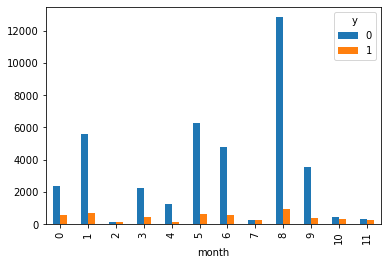

In [33]:
pd.crosstab(bank_data.month,bank_data.y).plot(kind="bar")

###  poutcome vs y 

In [34]:
pd.crosstab(bank_data.poutcome,bank_data.y)

y,0,1
poutcome,,
0,4283,618
1,1533,307
2,533,978
3,33573,3386


<AxesSubplot:xlabel='poutcome'>

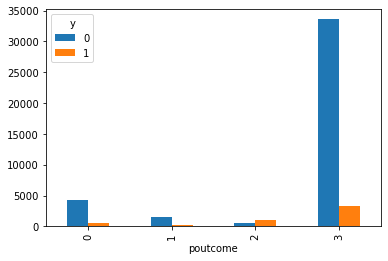

In [35]:
pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind="bar")

##  Building Logistic Regression Model

In [36]:
bank_data.shape

(45211, 17)

In [37]:
X = bank_data.iloc[:,0:16]
Y = bank_data.iloc[:,16]
model_lr = LogisticRegression()
model_lr.fit(X,Y)

E:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
model_lr.coef_

array([[-3.16733488e-02,  1.45349138e-02, -9.21061449e-02,
        -1.31804700e-02, -4.79235642e-03,  3.99869000e-05,
        -1.81547329e-01, -5.34888626e-02, -1.86708544e-01,
        -8.41546217e-03, -6.01236104e-02,  3.27074700e-03,
        -2.67001815e-01, -1.23886103e-03,  1.19975710e-01,
        -1.80534406e-01]])

In [39]:
predict = model_lr.predict(X)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [40]:
bank_data["predict"] = predict
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,predict
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [41]:
prob = pd.DataFrame(model_lr.predict_proba(X.iloc[:,:]))
bank_1 = pd.concat([bank_data, prob],axis=1)
bank_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,predict,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.948530,0.051470
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.948878,0.051122
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.946958,0.053042
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.960854,0.039146
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.903418,0.096582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0,0.615510,0.384490
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.920164,0.079836
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0,0.671993,0.328007
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.940343,0.059657


##   Confusion matrix 

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,predict)
confusion_matrix

array([[39279,   643],
       [ 4438,   851]], dtype=int64)

In [43]:
pd.crosstab(Y,predict)

col_0,0,1
y,,
0,39279,643
1,4438,851


##  Accuracy 

In [44]:
accuracy = sum(Y==predict)/bank.shape[0]
accuracy

0.8876158457012674

##   Classification report 

In [45]:
classification = classification_report(Y,predict)
print(classification)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



##  ROC curve

In [46]:
lr_roc_score = roc_auc_score(Y,model_lr.predict(X))
lr_roc_score

0.5723967867991099

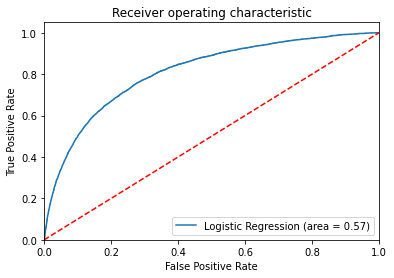

In [47]:
fpr, tpr, thresholds = roc_curve(Y, model_lr.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

##  Logistic regression model using statsmodel 

In [48]:
lr = sm.Logit(Y, X)  

In [49]:
lr.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Tue, 30 Mar 2021   Pseudo R-squ.:                  0.2342
Time:                        14:23:25   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

###   pvalue for education, month and pdays are greater than 0.05 

##  Improve the logistic regression model 

In [50]:
bank_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [51]:
bank_2 = bank_2.drop(["education","month","pdays"],axis=1)
bank_2

,age,job,marital,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y
0,58,4,1,0,2143,1,0,2,5,261,1,0,3,0
1,44,9,2,0,29,1,0,2,5,151,1,0,3,0
2,33,2,1,0,2,1,1,2,5,76,1,0,3,0
3,47,1,1,0,1506,1,0,2,5,92,1,0,3,0
4,33,11,2,0,1,0,0,2,5,198,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,0,825,0,0,0,17,977,3,0,3,1
45207,71,5,0,0,1729,0,0,0,17,456,2,0,3,1
45208,72,5,1,0,5715,0,0,0,17,1127,5,3,2,1
45209,57,1,1,0,668,0,0,1,17,508,4,0,3,0


In [52]:
x = bank_2.iloc[:,0:13]
y = bank_2.iloc[:,-1]

In [53]:
model_lr1 = LogisticRegression().fit(x,y)

E:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
predict_1 = model_lr1.predict(x)
bank_2["predict_1"] =predict_1
bank_2

,age,job,marital,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y,predict_1
0,58,4,1,0,2143,1,0,2,5,261,1,0,3,0,0
1,44,9,2,0,29,1,0,2,5,151,1,0,3,0,0
2,33,2,1,0,2,1,1,2,5,76,1,0,3,0,0
3,47,1,1,0,1506,1,0,2,5,92,1,0,3,0,0
4,33,11,2,0,1,0,0,2,5,198,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,0,825,0,0,0,17,977,3,0,3,1,0
45207,71,5,0,0,1729,0,0,0,17,456,2,0,3,1,0
45208,72,5,1,0,5715,0,0,0,17,1127,5,3,2,1,0
45209,57,1,1,0,668,0,0,1,17,508,4,0,3,0,0


In [55]:
prob_1 = pd.DataFrame(model_lr1.predict_proba(x.iloc[:,:]))
bank_3 = pd.concat([bank_2, prob_1],axis=1)
bank_3

,age,job,marital,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y,predict_1,0,1
0,58,4,1,0,2143,1,0,2,5,261,1,0,3,0,0,0.946820,0.053180
1,44,9,2,0,29,1,0,2,5,151,1,0,3,0,0,0.939696,0.060304
2,33,2,1,0,2,1,1,2,5,76,1,0,3,0,0,0.952470,0.047530
3,47,1,1,0,1506,1,0,2,5,92,1,0,3,0,0,0.964704,0.035296
4,33,11,2,0,1,0,0,2,5,198,1,0,3,0,0,0.868494,0.131506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,0,825,0,0,0,17,977,3,0,3,1,0,0.503715,0.496285
45207,71,5,0,0,1729,0,0,0,17,456,2,0,3,1,0,0.897648,0.102352
45208,72,5,1,0,5715,0,0,0,17,1127,5,3,2,1,0,0.573588,0.426412
45209,57,1,1,0,668,0,0,1,17,508,4,0,3,0,0,0.945356,0.054644


##  Accuracy 

In [56]:
accuracy = sum(y ==predict_1)/bank.shape[0]
accuracy

0.8879033863440313

##   Confusion matrix 

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = confusion_matrix(y,predict_1)
print(confusion_matrix_1)

[[39194   728]
 [ 4340   949]]


In [58]:
pd.crosstab(y,predict_1)

col_0,0,1
y,,
0,39194,728
1,4340,949


##   Classification report 

In [59]:
classification_1 = classification_report(y,predict_1)
print(classification_1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



##  ROC curve

In [60]:
lr1_roc_score = roc_auc_score(y,model_lr1.predict(x))
lr1_roc_score

0.5805967221258236

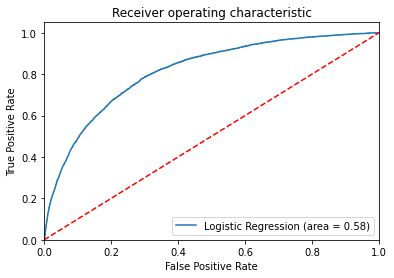

In [61]:
fpr, tpr, thresholds = roc_curve(y,model_lr1.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr1_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

##  Logistic model using statsmodel 

In [62]:
lr_1 = sm.Logit(y,x)  

In [63]:
lr_1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276414
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45198
Method:                           MLE   Df Model:                           12
Date:                Tue, 30 Mar 2021   Pseudo R-squ.:                  0.2340
Time:                        14:25:04   Log-Likelihood:                -12497.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0224      0.001    -20.431      0.000      -0.025      -0.020
job           -0.0140      0.005     -2.768      0.006      -0.024      -0.004
marital       -0.1669      0.024     -6.945      0.000      -0.214      -0.120
default       -0.4003      0.159     -2.523      0.012      -0.711      -0.089
balance      2.03e-05   4.49e-06      4.517      0.000    1.15e-05    2.91e-05
housing       -1.2545      0.035    -36.324      0.000      -1.322      -1.187
loan          -0.8263      0.056    -14.679      0.000      -0.937      -0.716
contact       -0.5937      0.026    -23.035      0.000      -0.644      -0.543
day           -0.0163      0.002     -8.320      0.000      -0.020      -0.012
duration       0.0038      6e-05     63.212      0.000       0.004       0.004
campaign      -0.1679      0.010    -16.042      0.000      -0.188      -0.147
previous       0.0577      0.008      7.409      0.000       0.042       0.073
poutcome      -0.2356      0.016    -14.407      0.000      -0.268      -0.204
==============================================================================
"""

In [64]:
print (classification)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [65]:
print(classification_1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



###  Hence both the  models performed very well for the majority class, with precision, recall metrics all above 0.9.